# Pricing des produits d'assurance

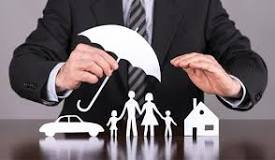

# Introduction 

Dans le monde complexe de l'assurance, la tarification des produits est une démarche cruciale, exigeant une évaluation minutieuse des risques individuels pour déterminer les primes appropriées. Cette tarification s'appuie sur des modèles mathématiques et statistiques sophistiqués, qui intègrent une variété de variables pour estimer les probabilités de sinistre et les coûts associés. Dans ce projet, nous explorons deux approches de tarification bien établies : les méthodes de Black-Scholes et de Monte Carlo.



Le cadre de notre étude repose sur des données simulées, générées à partir d'une gamme de caractéristiques individuelles, telles que l'âge, le revenu, le score de crédit, le ratio dette/revenu, le nombre de cartes de crédit, la possession d'un logement et le montant total des prêts. Ces données sont cruciales pour évaluer les risques et les profils des assurés, formant ainsi la base de toute tarification d'assurance.



Dans ce projet, nous discuterons des principes fondamentaux des méthodes de Black-Scholes et de Monte Carlo, mettant en lumière leurs applications et leurs avantages respectifs dans ce domaine. Ensuite, nous passerons à une comparaison approfondie de ces deux approches, en analysant leur précision, leur robustesse et leur adaptabilité aux différentes situations.




Notre objectif ultime est de fournir aux compagnies d'assurance une analyse complète et objective pour les aider à prendre des décisions éclairées concernant leur processus de tarification. En comprenant les forces et les limitations de chaque méthode, les assureurs peuvent optimiser leurs stratégies tarifaires, améliorer la rentabilité et mieux répondre aux besoins de leurs clients. Cette étude devrait donc offrir des perspectives précieuses pour l'industrie de l'assurance dans sa quête d'efficacité et de compétitivité sur le marché.

### importation des bibliothéques 

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


### Desription des varibles 

### Génération de données d'assurance simulées :
######  num_claims: 
Nombre aléatoire de réclamations pour chaque client, généré uniformément entre 0 et 5.
######  ages:
Âges aléatoires générés à partir d'une distribution normale avec une moyenne de 40 ans et un écart-type de 10 ans.
######  incomes: 
Revenus aléatoires uniformément distribués entre 30 000 et 150 000.
######  credit_scores: 
Scores de crédit aléatoires uniformément distribués entre 300 et 850.
######  dti_ratios: 
Ratios dette/revenu aléatoires uniformément distribués entre 0 et 1.
######  num_credit_cards:
Nombre aléatoire de cartes de crédit pour chaque client, généré uniformément entre 1 et 5.
######  owns_home: 
Variable binaire indiquant si le client possède une maison, générée aléatoirement.
######  num_loans_per_customer:
Nombre aléatoire de prêts pour chaque client, généré uniformément entre 0 et 4.
### Génération des données sur les prêts :
Pour chaque client, si le nombre de prêts est supérieur à zéro, des montants de prêts aléatoires sont générés uniformément entre 10 000 et 100 000, puis la somme des montants est calculée pour obtenir le total des prêts. Sinon, le total des prêts est défini à zéro.
### Génération des prix réels des produits d'assurance :
Les prix réels des produits d'assurance sont générés de manière aléatoire uniformément entre 500 et 1400 pour chaque client.
#### Paramètres de simulation :
###### num_samples:
Nombre d'échantillons, c'est-à-dire le nombre de clients pour lesquels nous simulons les données.
######  mean_base_price:
Prix de base moyen du produit d'assurance.
######  std_base_price:
Écart-type du prix de base.
###### risk_factor_price_coefficient: 
Coefficient pour l'impact des facteurs de risque sur le prix.


In [2]:

# Définir les paramètres pour la simulation de Monte Carlo
num_samples = 1000  # Nombre d'échantillons
mean_base_price = 500  # Prix de base moyen du produit d'assurance
std_base_price = 50  # Écart-type du prix de base
risk_factor_price_coefficient = 100  # Coefficient pour l'impact des facteurs de risque sur le prix

# Générer des données d'assurance simulées
np.random.seed(42)

# Générer un nombre aléatoire de réclamations pour chaque client
num_claims = np.random.randint(0, 5, num_samples)

# Générer des âges aléatoires à partir d'une distribution normale
ages = np.random.normal(40, 10, num_samples).astype(int)

# Générer des revenus aléatoires uniformément distribués entre 30 000 et 150 000
incomes = np.random.uniform(30000, 150000, num_samples)

# Générer des scores de crédit aléatoires uniformément distribués entre 300 et 850
credit_scores = np.random.randint(300, 850, num_samples)

# Générer des ratios dette/revenu aléatoires uniformément distribués entre 0 et 1
dti_ratios = np.random.uniform(0, 1, num_samples)

# Générer un nombre aléatoire de cartes de crédit pour chaque client
num_credit_cards = np.random.randint(1, 5, num_samples)

# Générer une variable binaire indiquant si le client possède une maison
owns_home = np.random.randint(0, 2, num_samples)

# Générer un nombre aléatoire de prêts pour chaque client
num_loans_per_customer = np.random.randint(0, 4, num_samples)

# Générer des données sur les prêts
loans = []
for num_loans in num_loans_per_customer:
    if num_loans > 0:
        loan_amounts = np.random.uniform(10000, 100000, num_loans)
        loans.append(sum(loan_amounts))
    else:
        loans.append(0)

# Générer les prix réels des produits d'assurance
real_prices = np.random.uniform(500, 1400, num_samples)




In [3]:
# Créer un DataFrame pour stocker les données simulées
insurance_data = pd.DataFrame({'Age': ages,
                               'Income': incomes,
                               'Credit_Score': credit_scores,
                               'Debt_to_Income_Ratio': dti_ratios,
                               'Num_Credit_Cards': num_credit_cards,
                               'Owns_Home': owns_home,
                               'Total_Loan_Amount': loans,
                               'Num_Claims': num_claims,
                               'Real_Insurance_Price': real_prices})

print(insurance_data.head())


   Age         Income  Credit_Score  Debt_to_Income_Ratio  Num_Credit_Cards  \
0   41   42656.843995           583              0.761676                 3   
1   47  108813.612567           748              0.507082                 2   
2   44  128652.379272           600              0.637902                 4   
3   42   75650.400901           367              0.985175                 1   
4   32  123073.422111           306              0.768005                 2   

   Owns_Home  Total_Loan_Amount  Num_Claims  Real_Insurance_Price  
0          0       74310.611148           3           1265.339227  
1          0      163456.976186           4            706.732084  
2          1      157293.179153           2            715.738170  
3          0       98133.696226           4            835.344593  
4          0           0.000000           4            707.308549  


In [4]:
insurance_data

,Age,Income,Credit_Score,Debt_to_Income_Ratio,Num_Credit_Cards,Owns_Home,Total_Loan_Amount,Num_Claims,Real_Insurance_Price
0,41,42656.843995,583,0.761676,3,0,74310.611148,3,1265.339227
1,47,108813.612567,748,0.507082,2,0,163456.976186,4,706.732084
2,44,128652.379272,600,0.637902,4,1,157293.179153,2,715.738170
3,42,75650.400901,367,0.985175,1,0,98133.696226,4,835.344593
4,32,123073.422111,306,0.768005,2,0,0.000000,4,707.308549
...,...,...,...,...,...,...,...,...,...
995,24,135959.258980,446,0.174590,3,0,42531.879565,1,1172.969083
996,48,54315.916096,789,0.707426,2,1,156483.358359,0,897.004548
997,39,100510.304533,777,0.711778,4,1,0.000000,0,1160.259646
998,38,114136.751330,458,0.898355,2,1,140681.740872,3,1062.524109


In [5]:
insurance_data.shape


(1000, 9)

## Monte Carlo

In [7]:
# Simuler les prix de base à partir d'une distribution normale
base_prices = np.random.normal(mean_base_price, std_base_price, num_samples)

# Définir les facteurs de risque affectant les prix
risk_factors = ['Num_Credit_Cards', 'Owns_Home', 'Num_Claims']

# Calculer l'impact des facteurs de risque sur les prix
risk_factor_impact = risk_factor_price_coefficient * insurance_data[risk_factors].sum(axis=1)

# Calculer les prix totaux en ajoutant les prix de base et l'impact des facteurs de risque
insurance_data['Insurance_Product_Price 1'] = base_prices + risk_factor_impact



Ce code simule les prix de base des produits d'assurance à partir d'une distribution normale avec une moyenne de mean_base_price et un écart-type de std_base_price. Ensuite, il définit certains facteurs de risque qui peuvent affecter les prix des produits d'assurance, tels que le nombre de cartes de crédit, la possession d'une maison et le nombre de réclamations. En multipliant ces facteurs de risque par le coefficient risk_factor_price_coefficient, il calcule l'impact des facteurs de risque sur les prix. Enfin, il calcule les prix totaux des produits d'assurance en ajoutant les prix de base et l'impact des facteurs de risque.







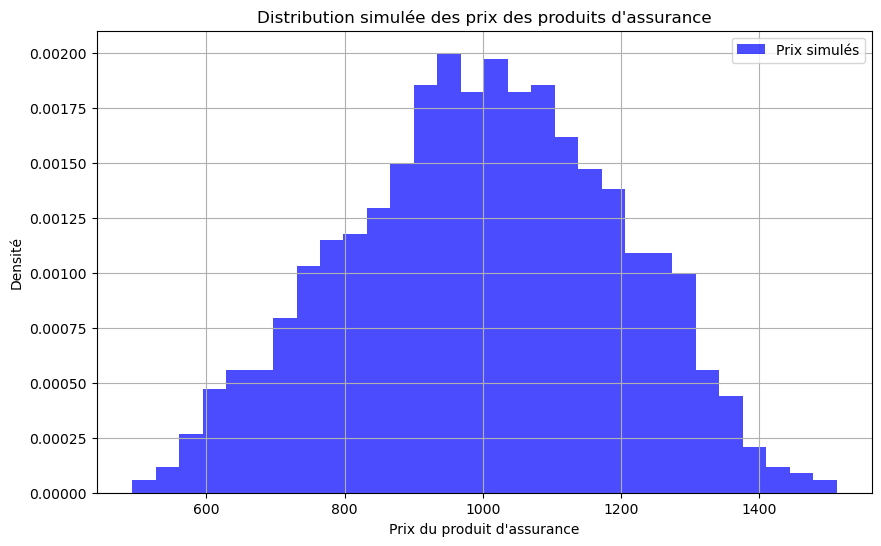

In [8]:
# Tracer l'histogramme
plt.figure(figsize=(10, 6))
plt.hist(insurance_data['Insurance_Product_Price 1'], bins=30, color='blue', alpha=0.7, density=True, label='Prix simulés')

# Ajouter des légendes et des titres
plt.xlabel('Prix du produit d\'assurance')
plt.ylabel('Densité')
plt.title('Distribution simulée des prix des produits d\'assurance')
plt.legend()
plt.grid(True)
plt.show()


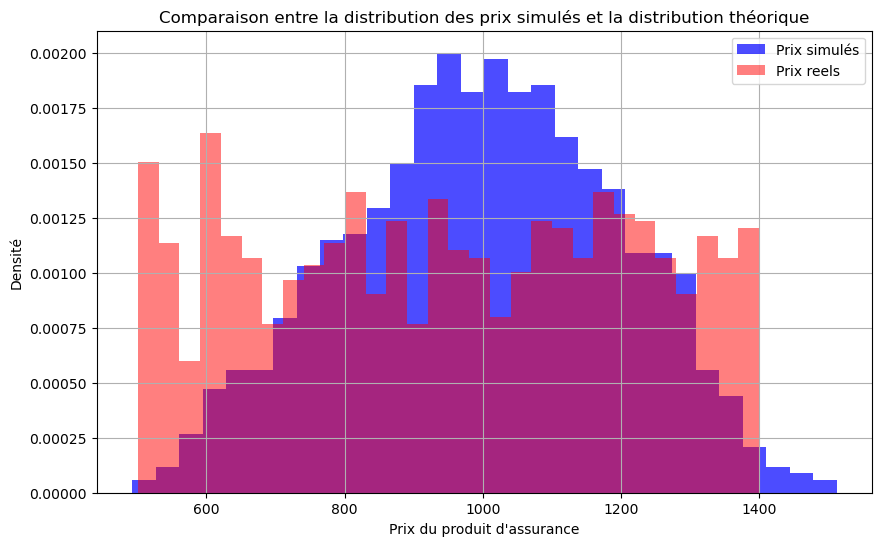

In [9]:


# Plot the simulated Insurance_Product_Price
plt.figure(figsize=(10, 6))
plt.hist(insurance_data['Insurance_Product_Price 1'], bins=30, color='blue', alpha=0.7, density=True, label='Prix simulés')

# Plot the theoretical distribution
plt.hist(insurance_data['Real_Insurance_Price'], bins=30, color='red', alpha=0.5, density=True, label='Prix reels')

# Add labels and titles
plt.xlabel('Prix du produit d\'assurance')
plt.ylabel('Densité')
plt.title('Comparaison entre la distribution des prix simulés et la distribution théorique')
plt.legend()
plt.grid(True)
plt.show()




### Distribution des prix simulés :

La forme asymétrique à droite de la distribution suggère que la majorité des simulations ont généré des prix d'assurance plus bas, tandis qu'un nombre moins important a produit des prix plus élevés.
Ceci pourrait indiquer une tendance à la sous-estimation des prix plus élevés par le modèle de simulation.
### Comparaison avec la distribution théorique :
L'écart entre la distribution des prix simulés et la distribution théorique (normale) met en évidence un écart potentiel entre les prix simulés et les prix attendus selon le modèle théorique.

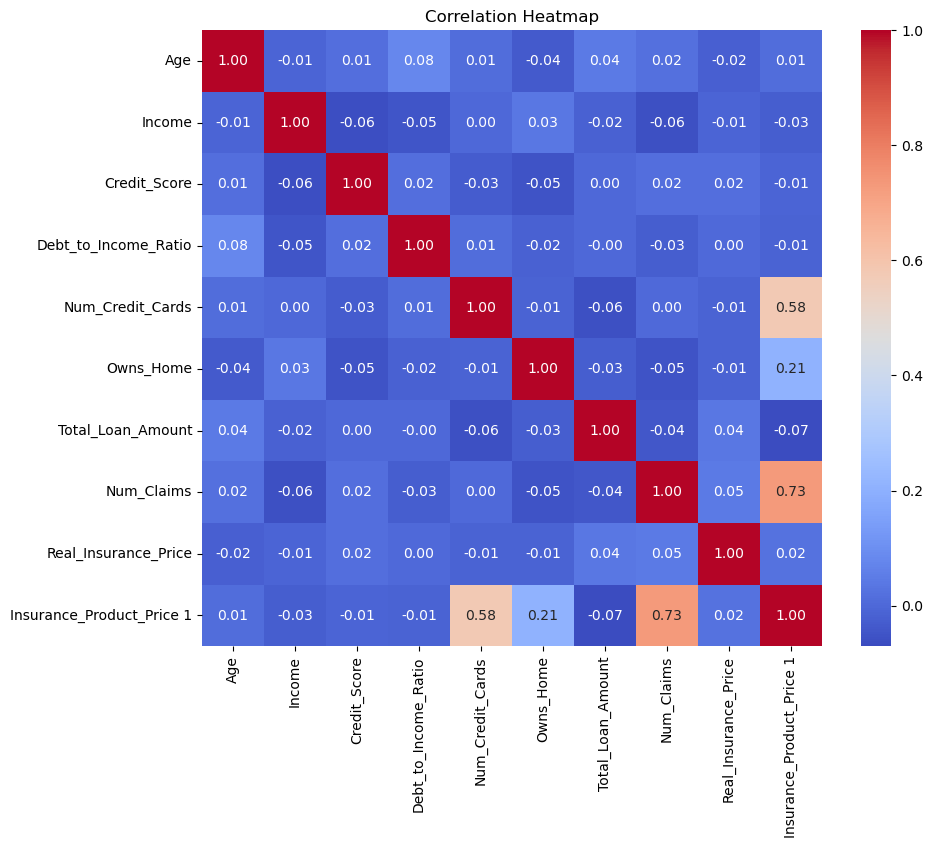

In [10]:


# Create a correlation matrix
corr = insurance_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [11]:


# Diviser les données en ensembles d'entraînement et de test
X = insurance_data.drop('Insurance_Product_Price 1', axis=1)  # Variables explicatives
y = insurance_data['Insurance_Product_Price 1']  # Variable cible

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajuster le modèle sur l'ensemble d'entraînement
model = LinearRegression()
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer la performance du modèle
r_squared = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Performance du modèle sur l'ensemble de test Monte Carlo :")
print(f"R² : {r_squared}")
print(f"RMSE : {rmse}")


Performance du modèle sur l'ensemble de test Monte Carlo :
R² : 0.9206130719302564
RMSE : 52.44899016385823




- Le coefficient de détermination R² de 0.92 indique que le modèle capture bien la variance des données réelles. Un R² proche de 1 indique un bon ajustement du modèle aux données observées.

- Le RMSE (Root Mean Square Error) de 52.45 indique l'erreur moyenne entre les valeurs prédites et les valeurs réelles. Plus le RMSE est bas, meilleure est la performance du modèle, car cela signifie que les prédictions sont proches des valeurs réelles en moyenne.



In [45]:
real_prices = insurance_data['Real_Insurance_Price']
simulated_prices = insurance_data['Insurance_Product_Price 1']
def calculate_mape(y_true, y_pred):
    n = len(y_true)
    mape = (1/n) * sum(abs((y_true[i] - y_pred[i]) / y_true[i]) for i in range(n)) * 100
    return mape

# Exemple d'utilisation :
mape = calculate_mape(real_prices, simulated_prices)
print("MAPE du modèle Monte Carlo :", mape)


MAPE du modèle Monte Carlo : 32.58798101956578


Une MAPE de 32.59% signifie que, en moyenne, les prédictions du modèle Monte Carlo diffèrent d'environ 32.59% des valeurs réelles. En d'autres termes, les prédictions du modèle ont une erreur absolue moyenne d'environ 32.59% par rapport aux valeurs réelles. 

Cette valeur de MAPE peut être interprétée comme une mesure de l'exactitude des prédictions du modèle. Plus la MAPE est faible, meilleure est la précision du modèle. Dans ce cas, une MAPE de 32.59% indique une précision moyenne du modèle Monte Carlo dans la prédiction des prix des produits d'assurance. 



## Black and shloes 

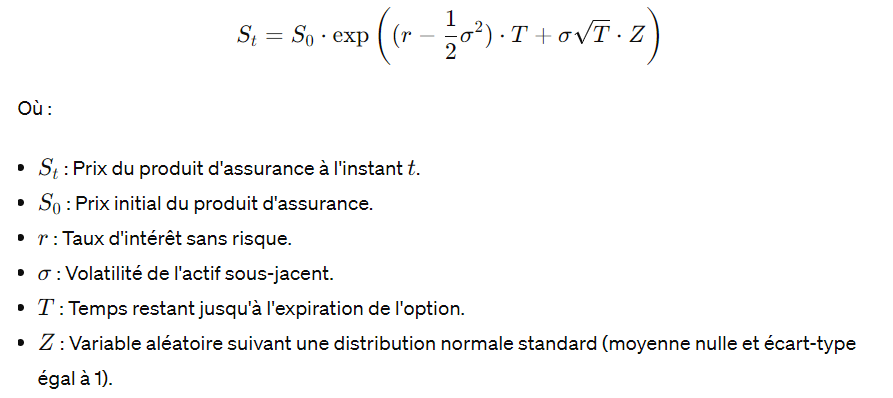

Ce code utilise le modèle de Black-Scholes pour simuler les prix d'un produit d'assurance. Il définit les paramètres du modèle et simule les prix en utilisant une distribution normale pour les fluctuations aléatoires. Les prix simulés sont ensuite ajoutés au DataFrame insurance_data.

In [39]:
def simulate_insurance_prices(S0, r, sigma, T, num_samples):
    # Calculer les prix simulés à l'aide du modèle de Black-Scholes pour chaque échantillon
    simulated_prices = []
    for i in range(num_samples):
        S = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * np.random.normal())
        simulated_prices.append(S)
    
    return simulated_prices

# Paramètres du modèle de Black-Scholes
S0 = insurance_data['Real_Insurance_Price'].iloc[-1]  # Utilisation du dernier prix comme S0
r = 0.05  # Taux d'intérêt sans risque
sigma = 0.2  # Volatilité de l'actif sous-jacent (hypothétique)
T = 0.8  # Temps restant jusqu'à l'expiration de l'option (hypothétique)
num_samples = len(insurance_data)  # Nombre d'échantillons à simuler, égal à la taille des données existantes

# Simulation des prix des produits d'assurance
simulated_prices = simulate_insurance_prices(S0, r, sigma, T, num_samples)

# Ajout de la colonne des prix simulés à insurance_data
insurance_data['Insurance_Product_Price_2'] = simulated_prices

# Affichage des premières lignes du DataFrame avec la colonne ajoutée
print(insurance_data.head())


   Age         Income  Credit_Score  Debt_to_Income_Ratio  Num_Credit_Cards  \
0   41   42656.843995           583              0.761676                 3   
1   47  108813.612567           748              0.507082                 2   
2   44  128652.379272           600              0.637902                 4   
3   42   75650.400901           367              0.985175                 1   
4   32  123073.422111           306              0.768005                 2   

   Owns_Home  Total_Loan_Amount  Num_Claims  Real_Insurance_Price  \
0          0       74310.611148           3           1265.339227   
1          0      163456.976186           4            706.732084   
2          1      157293.179153           2            715.738170   
3          0       98133.696226           4            835.344593   
4          0           0.000000           4            707.308549   

   Insurance_Product_Price 1  Insurance_Product_Price_2  
0                1080.844123                1231.822

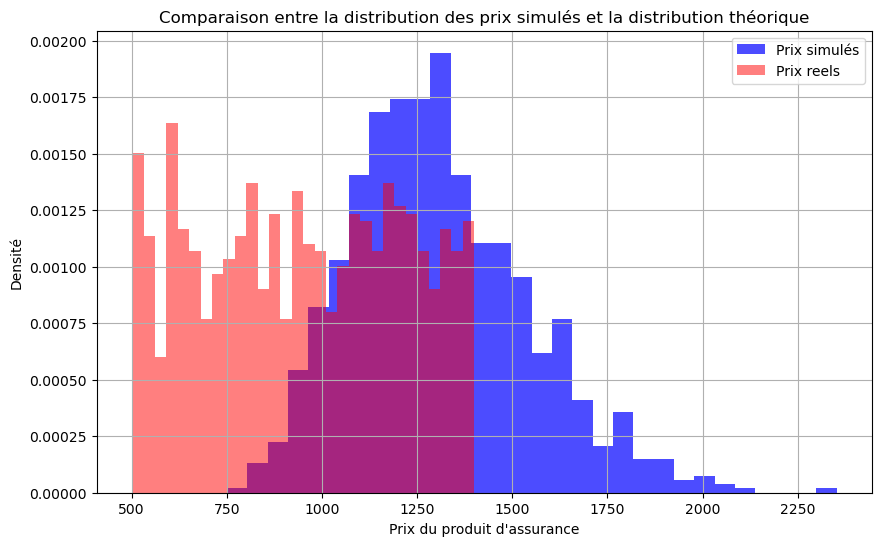

In [38]:
# Plot the simulated Insurance_Product_Price
plt.figure(figsize=(10, 6))
plt.hist(insurance_data['Insurance_Product_Price_2'], bins=30, color='blue', alpha=0.7, density=True, label='Prix simulés')

# Plot the theoretical distribution
plt.hist(insurance_data['Real_Insurance_Price'], bins=30, color='red', alpha=0.5, density=True, label='Prix reels')

# Add labels and titles
plt.xlabel('Prix du produit d\'assurance')
plt.ylabel('Densité')
plt.title('Comparaison entre la distribution des prix simulés et la distribution théorique')
plt.legend()
plt.grid(True)
plt.show()


Le fait que la distribution des prix simulés soit asymétrique à droite suggère que le modèle utilisé pour simuler les prix pourrait sous-estimer la probabilité de prix plus élevés.

In [40]:

# Diviser les données en ensembles d'entraînement et de test
X = insurance_data.drop('Insurance_Product_Price_2', axis=1)  # Variables explicatives
y = insurance_data['Insurance_Product_Price_2']  # Variable cible

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajuster le modèle sur l'ensemble d'entraînement
model = LinearRegression()
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer la performance du modèle
r_squared = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Performance du modèle sur l'ensemble de test Black and sholes :")
print(f"RMSE : {rmse}")


Performance du modèle sur l'ensemble de test Black and sholes :
RMSE : 240.71040969868628


Comparons les performances des deux modèles en utilisant le RMSE (Root Mean Square Error) :

- Pour le modèle Monte Carlo :
  
  - RMSE : 52.45

- Pour le modèle Black-Scholes :
  - RMSE : 240.71

Le modèle Monte Carlo présente un RMSE beaucoup plus bas que le modèle Black-Scholes. Cela indique que le modèle Monte Carlo produit des prédictions plus précises par rapport aux données réelles par rapport au modèle Black-Scholes, du moins sur cet ensemble de test spécifique.

### Conclusion

En conclusion, notre étude met en évidence l'importance de choisir le bon modèle de tarification dans l'industrie de l'assurance. Bien que les méthodes de Black-Scholes et de Monte Carlo soient toutes deux utilisées dans ce domaine, nos résultats suggèrent que le modèle Monte Carlo peut offrir une meilleure précision et une plus grande adaptabilité dans la tarification des produits d'assurance. Les compagnies d'assurance devraient donc envisager d'intégrer le modèle Monte Carlo dans leur processus de tarification pour améliorer la précision de leurs prédictions et mieux répondre aux besoins de leurs clients.

## Réferences 
1-Applications of  Monte Carlo Methods to Finance and Insurance Thomas N. Herzog, ASA, Ph.D.  Graham Lord, ASA, Ph.D.

2-Pricing European Call Option with Monte Carlo Simulation Prof. Dr. Brenda L´opez Cabrera